# Distribution of Population

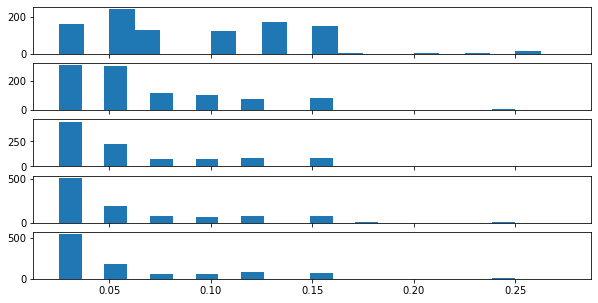

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# TODO: Remove slurm id
population_datasets = ['moons_population_10_10_30214803.csv', 
                       'circles_population_10_10_30214804.csv', 
                       'linearly_separable_population_10_10_30214802.csv']
hof_datasets = ['moons_hof_10_10_30214803.csv', 
                'circles_hof_10_10_30214804.csv', 
                'linearly_separable_hof_10_10_30214802.csv']

# Examine distribution of fitness over each generation
# We observe that with each coming generation more of the population has the min 
# fitness value.

# Observing the aggregate of all trials we observe that the first bin increases
# with each generation.
idx = 0
hof_df = pd.read_csv(hof_datasets[idx], header=None, delimiter=';')
population_df = pd.read_csv(population_datasets[idx], header=None, delimiter=';')

median = []
mean = []
min_val = []
max_val = []

num_subplots = 5
fig, axs = plt.subplots(num_subplots, figsize=(10,5), sharex=True,)
for i in range(num_subplots):
    rows = population_df[population_df[0]==i]
    fitness = rows[2]
    #axs[i].hist(fitness, bins=[0,0.03, 0.05, 0.076, 0.1])
    #axs[i].hist(fitness, bins=20, density=True)
    axs[i].hist(fitness, bins=20)

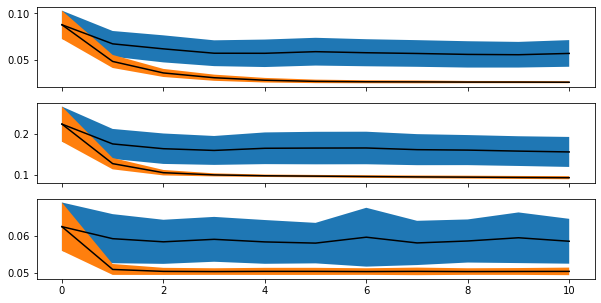

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# TODO: Remove slurm id
population_datasets = ['moons_population_10_10_30214803.csv', 
                       'circles_population_10_10_30214804.csv', 
                       'linearly_separable_population_10_10_30214802.csv']
hof_datasets = ['moons_hof_10_10_30214803.csv', 
                'circles_hof_10_10_30214804.csv', 
                'linearly_separable_hof_10_10_30214802.csv']

fig, axs = plt.subplots(3, sharex=True, figsize=(10,5))

for idx in range(3):
    hof_df = pd.read_csv(hof_datasets[idx], header=None, delimiter=';')
    population_df = pd.read_csv(population_datasets[idx], header=None, delimiter=';')

    # Using a line plot we show how generational fitness average changes
    # Using means of means and standard deviation of the sample means

    generations = list(range(0, 11))

    # trials x generation number
    trial_means = np.zeros((100, 11))

    population_df.head(10 * 11)
    population_df[10*11: 10*11*2]

    for i in range(0, 100):
        sample = population_df[10*11*i: 10*11*(i+1)]
        for j in range(0, 11):
            # Get all rows for generation j
            rows = sample[sample[0] == j]
            trial_means[i,j] = (rows[2].mean())
            #trial_means[i,j] = np.median(rows[2])


    means_of_means = np.zeros(11)
    for i in range(11):
        means_of_means[i] = trial_means[:,i].mean()
        #means_of_means[i] = np.median(trial_means[:,i])


    std_sample_means = np.zeros(11)
    for i in range(11):
        rows = population_df[population_df[0] == i]
        pop_std = rows[2].std()
        std_sample_means[i] = pop_std/np.sqrt(10)

    # Using a line plot we show how generational fitness hof changes
    # Using means of means and standard deviation of the sample means

    generations = list(range(0, 11))

    # rials x generation number
    hof_trial_means = np.zeros((100, 11))

    for i in range(0, 100):
        sample = hof_df[10*11*i: 10*11*(i+1)]
        for j in range(0, 11):
            # Get all rows for generation j
            rows = sample[sample[0] == j]
            hof_trial_means[i,j] = (rows[2].mean())
            #hof_trial_means[i,j] = np.median(rows[2])


    hof_std_sample_means = np.zeros(11)
    for i in range(11):
        rows = hof_df[population_df[0] == i]
        pop_std = rows[2].std()
        hof_std_sample_means[i] = pop_std/np.sqrt(10)

    hof_means_of_means = np.zeros(11)
    for i in range(11):
        hof_means_of_means[i] = hof_trial_means[:,i].mean()
        #hof_means_of_means[i] = np.median(hof_trial_means[:,i])

    axs[idx].plot(generations, means_of_means, 'k-')
    axs[idx].fill_between(generations, means_of_means - 1 *std_sample_means, means_of_means + 1*std_sample_means)
    axs[idx].plot(generations, hof_means_of_means, 'k-')
    axs[idx].fill_between(generations, hof_means_of_means - 1*hof_std_sample_means, hof_means_of_means + 1*hof_std_sample_means)

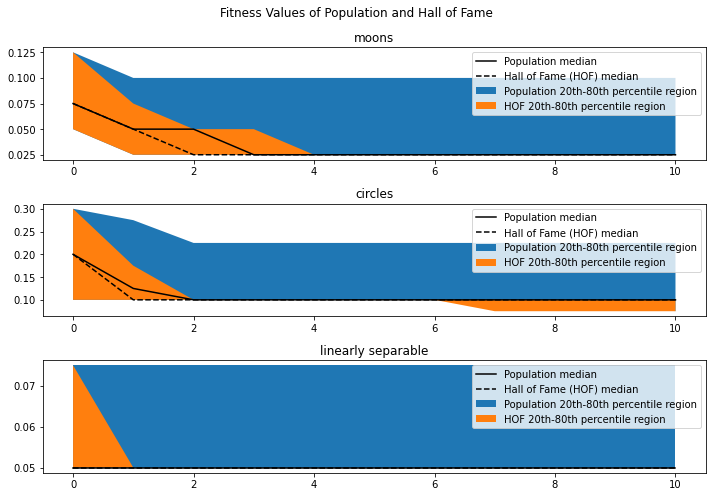

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# TODO: Remove slurm id
population_datasets = ['moons_population_10_10_30214803.csv', 
                       'circles_population_10_10_30214804.csv', 
                       'linearly_separable_population_10_10_30214802.csv']
hof_datasets = ['moons_hof_10_10_30214803.csv', 
                'circles_hof_10_10_30214804.csv', 
                'linearly_separable_hof_10_10_30214802.csv']

ds_names = ['moons', 'circles', 'linearly separable']

fig, axes = plt.subplots(3, figsize=(10,7))
fig.suptitle('Fitness Values of Population and Hall of Fame')
for ds_count in range(3):
    generations = list(range(11))
    low_bound = np.zeros(11)
    up_bound = np.zeros(11)
    medians = np.zeros(11)
    df = pd.read_csv(population_datasets[ds_count], header=None, delimiter=';')
    for i in range(11):
        gen = df[df[0] == i] # extract each generation
        gen_fit = gen[2]
        # 80% data
        low_bound[i] = gen_fit.quantile(.2)
        up_bound[i] = gen_fit.quantile(.8)
        medians[i] = gen_fit.quantile(.5)
    
    axes[ds_count].plot(generations, medians, 'k-', label='Population median')
    axes[ds_count].fill_between(generations, low_bound, up_bound, label='Population 20th-80th percentile region')
    
    df = pd.read_csv(hof_datasets[ds_count], header=None, delimiter=';')
    for i in range(11):
        gen = df[df[0] == i] # extract each generation
        gen_fit = gen[2]
        # 80% data
        low_bound[i] = gen_fit.quantile(.2)
        up_bound[i] = gen_fit.quantile(.8)
        medians[i] = gen_fit.quantile(.5)
    
    axes[ds_count].plot(generations, medians, 'k--', label='Hall of Fame (HOF) median')
    axes[ds_count].fill_between(generations, low_bound, up_bound, label='HOF 20th-80th percentile region')
    
    axes[ds_count].legend()
    axes[ds_count].set_title(ds_names[ds_count])

plt.tight_layout()
# We plot the medians of each generation of the population
# and the Hall of Fame, along 80% region around the median.
# This shows that the regions and the lines overlap, which
# indicates that it is possible to randomly select a good solution
# for each of these datasets. This suggests that the datasets
# are easy to find solutions to.